# Decision Regions

There are many machine learning algorithms, each with very different properties. How can we gain better understanding of how a given algorithm "sees" the data? In this course, we won't study the mathematical structure of our algorithms, but we can in certain cases visualize how they work. 

In this lecture, we'll take a look at the **decision regions** of various classifiers. The decision regions are just the parts of data space that the classifier assigns to each label. As we'll see, different classifiers can create very different decision regions, even when they are trained on the same input data. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Grabbing the data

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

## Data Prep

For our purposes today, it's useful to encode the three penguin species with labels 0, 1, and 2. We are going to focus on modeling using only two predictor variables today, the culmen length and depth. We use `df.dropna()` to drop the two penguins for which these variables were not measured. 

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins["label"] = le.fit_transform(penguins["Species"])
# penguins[["Species","label"]]
penguins = penguins.dropna(subset = ["Culmen Length (mm)", "Culmen Depth (mm)"])
X = penguins[["Culmen Length (mm)", "Culmen Depth (mm)"]]
y = penguins["label"]

In [4]:
X

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [5]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: label, Length: 342, dtype: int64

Now let's take a look! Encoding the species as integers 0, 1, 2 makes it easy to create a scatterplot by species, but difficult to add an informative legend. We aren't going to worry about the exact species right now, so we'll just think of them as blue, green, and red. 

[Text(0.5, 0, 'Culmen Length (mm)'), Text(0, 0.5, 'Culmen Depth (mm)')]

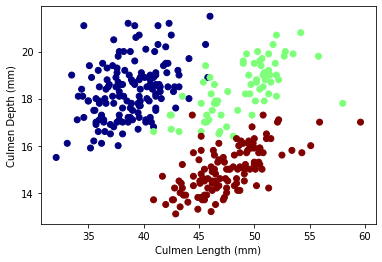

In [6]:
fig, ax = plt.subplots(1)

ax.scatter(X["Culmen Length (mm)"],
           X["Culmen Depth (mm)"], 
           c = y, 
           cmap = "jet")

ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")

## Decision Regions By Hand

The core idea of decision regions is to evaluate a given classifier on a large set of points -- often much larger than the actual data. We can then visualize in considerable detail how the classifier "makes decisions." The set of points where the model returns "0", for example, is the decision region for 0. The contours along which different decision regions meet are called **decision boundaries.**

The limitation of this approach is that it works best for classifiers which use only two numerical features. Let's see how to create decision regions by hand! For now, we'll use as our example a decision tree classifier. 

In [7]:
from sklearn import tree
T = tree.DecisionTreeClassifier(max_depth = 2)
T.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Next, we'll create a 2d grid of `501 x 501` points using `np.meshgrid`: 

In [8]:
x0 = X["Culmen Length (mm)"]
x1 = X["Culmen Depth (mm)"]

# create grid

grid_x = np.linspace(x0.min(), x0.max(), 501)
grid_y = np.linspace(x1.min(), x1.max(), 501)
xx, yy = np.meshgrid(grid_x, grid_y)

# a single point for prediction: 

xx[1, 2], yy[1, 2]

(32.21, 13.1168)

As is, we can't really use our classifier on these data. We need to reshape `xx` and `yy` so that they "look" more like the columns of a data frame. That is, all the points of `xx` should be in a 1d array. We can do this with `np.ravel()` and the `numpy` *concatenation* operator `np.c_`: 

In [9]:
XX = xx.ravel() # shortcut for reshape
XX.shape # size is 501 x 501

(251001,)

In [10]:
XX = xx.ravel()
YY = yy.ravel()
XY = np.array([XX, YY]).T

Better! Now we can make a prediction using our standard approach: 

In [11]:
p = T.predict(XY)
p

array([2, 2, 2, ..., 1, 1, 1])

Almost there! The next step toward visualization is to reshape the predictions back into a square grid that we can plot. 

In [12]:
p = p.reshape(xx.shape)

Now we're ready to make the plot! 

[Text(0.5, 0, 'Culmen Length (mm)'), Text(0, 0.5, 'Culmen Depth (mm)')]

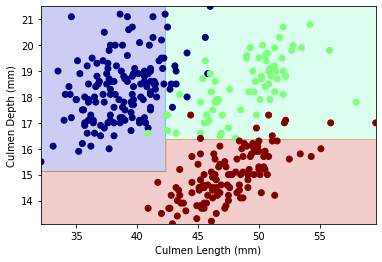

In [13]:
fig, ax = plt.subplots(1)

ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)

ax.scatter(x0, x1, c = y, cmap = "jet")

ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")

Here's the same code, wrapped up in a function. Feel free to modify this function and use it in your homework and project. 

In [14]:
def plot_regions(c, X, y):
        
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    XY = np.c_[XX, YY]
    
    p = c.predict(XY)
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)
    
    ax.set(xlabel = "Culmen Length (mm)", 
           ylabel = "Culmen Depth (mm)")

## Example Decision Trees

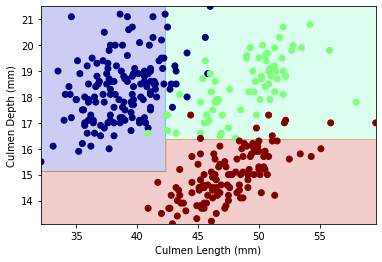

In [15]:
T = tree.DecisionTreeClassifier(max_depth = 2)
T.fit(X, y)
plot_regions(T, X, y)

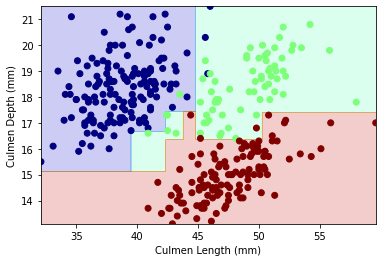

In [16]:
T = tree.DecisionTreeClassifier(max_depth = 5)
T.fit(X, y)
plot_regions(T, X, y)

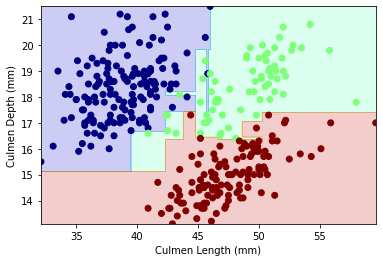

In [17]:
T = tree.DecisionTreeClassifier(max_depth = 20)
T.fit(X, y)
plot_regions(T, X, y)

## Random Forests

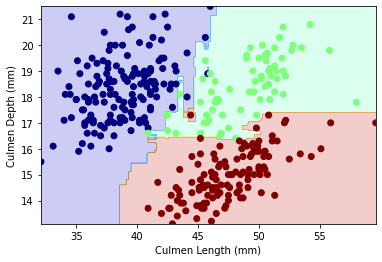

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
plot_regions(RF, X, y)

## Logistic Regression

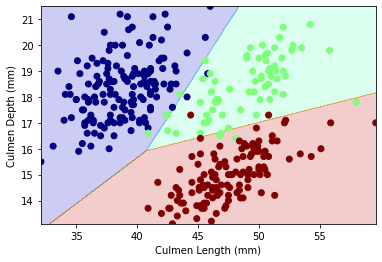

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)
plot_regions(LR, X, y)

## Support Vector Machines

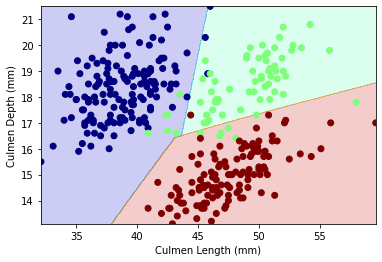

In [20]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X,y)
plot_regions(SVM, X, y)

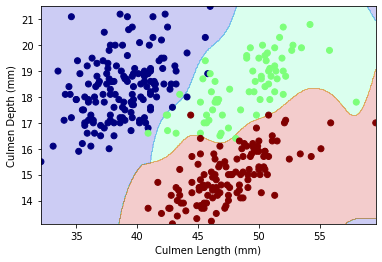

In [21]:
SVM = svm.SVC(gamma = 0.2)
SVM.fit(X,y)
plot_regions(SVM, X, y)

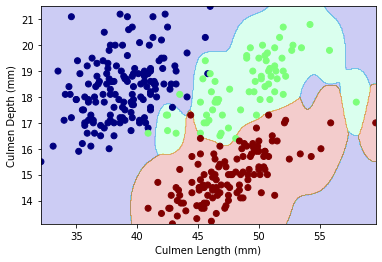

In [22]:
SVM = svm.SVC(gamma = 1.0)
SVM.fit(X,y)
plot_regions(SVM, X, y)

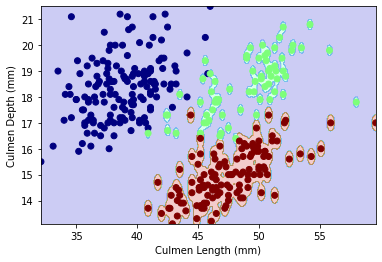

In [23]:
SVM = svm.SVC(gamma = 20.0)
SVM.fit(X,y)
plot_regions(SVM, X, y)

## Decision Regions Not By Hand

The package `mlxtend` can be used to create attractive decision regions using a built-in function. 

> **Warning**: This function can behave unpredictably when used to compare decision regions for multiple data subsets, and is therefore not recommendedo for projects. 

In [24]:
# you will need to run the below first to install this package: 
# conda install mlxtend
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

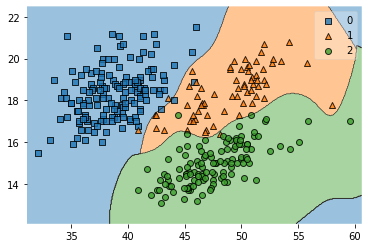

In [25]:
SVM = svm.SVC(gamma = 0.2)
SVM.fit(X, y)
plot_decision_regions(np.array(X), np.array(y), clf = SVM)

You can learn much more about this function and find some interesting examples on [this page](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/). 